<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 9.1 MB/s eta 0:00:00


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [7]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [8]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [9]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [10]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2022-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [12]:
help(CoinGeckoAPI().get_coin_market_chart_by_id)

Help on method input_args in module pycoingecko.utils:

input_args(*args, **kwargs) method of pycoingecko.api.CoinGeckoAPI instance



In [13]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [14]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [19]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1653926504380, 30641.644157734732],
 [1653930198406, 30627.26728114365],
 [1653933743676, 30727.151701036102],
 [1653937280905, 30711.22782546968],
 [1653940893275, 30675.071154599187]]

Finally lets turn this data into a Pandas DataFrame.


In [21]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])

Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [35]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(
    d/1000
))


In [36]:
data['date']

0      2022-05-30
1      2022-05-30
2      2022-05-30
3      2022-05-30
4      2022-05-30
          ...    
716    2022-06-29
717    2022-06-29
718    2022-06-29
719    2022-06-29
720    2022-06-29
Name: date, Length: 721, dtype: object

Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [28]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

In [29]:
candlestick_data

date         Price                                          
                         min           max         first          last
0   2022-05-30  30627.267281  31735.160764  30641.644158  31720.965572
1   2022-05-31  31484.748100  32206.261554  31740.940725  31858.210768
2   2022-06-01  29676.064111  31962.818221  31813.830602  29747.614539
3   2022-06-02  29716.147919  30516.490649  29822.072290  30516.490649
4   2022-06-03  29479.742840  30607.041609  30481.013996  29730.029168
5   2022-06-04  29571.032332  29844.875625  29714.143487  29833.887022
6   2022-06-05  29658.516890  30058.723813  29872.360309  30033.187158
7   2022-06-06  29917.764052  31565.665055  29917.764052  31430.237071
8   2022-06-07  29419.159655  31522.648011  31372.584763  31522.648011
9   2022-06-08  30189.236348  31233.354220  31233.354220  30329.529040
10  2022-06-09  30012.578885  30569.690067  30229.236836  30012.578885
11  2022-06-10  29022.074454  30135.269192  30097.079849  29191.898552
12  2022-06-11  28372.280420  29376.674692  29099.974925  28668.084455
13  2022-06-12  27081.503691  28533.772908  28374.144997  27081.503691
14  2022-06-13  22638.100478  26767.269173  26767.269173  22638.100478
15  2022-06-14  21046.945034  22930.746963  22525.768350  21605.290243
16  2022-06-15  20216.090126  22479.022667  22223.152111  22479.022667
17  2022-06-16  20473.081792  22664.041895  22583.879031  20473.081792
18  2022-06-17  20322.139665  21102.458082  20408.690491  20482.871611
19  2022-06-18  17760.773382  20587.113523  20470.301152  19125.887950
20  2022-06-19  18154.041128  20710.408400  19032.396102  20710.408400
21  2022-06-20  19812.971611  20887.528591  20552.806028  20487.794933
22  2022-06-21  20463.847875  21597.009838  20636.758912  20878.311467
23  2022-06-22  19864.169914  20713.205509  20700.923933  20141.031262
24  2022-06-23  19983.566483  21006.483612  19983.566483  21006.483612
25  2022-06-24  20813.876415  21331.439173  21100.270534  21331.439173
26  2022-06-25  21052.234957  21501.718372  21262.713483  21442.294989
27  2022-06-26  21123.118200  21637.931949  21525.880362  21123.118200
28  2022-06-27  20741.872124  21475.850907  21052.805398  20831.694366
29  2022-06-28  20275.064146  21108.771855  20751.477531  20328.497133
30  2022-06-29  19958.857850  20374.983539  20270.548294  20107.816595

Finally we are now ready to use plotly to create our Candlestick Chart.


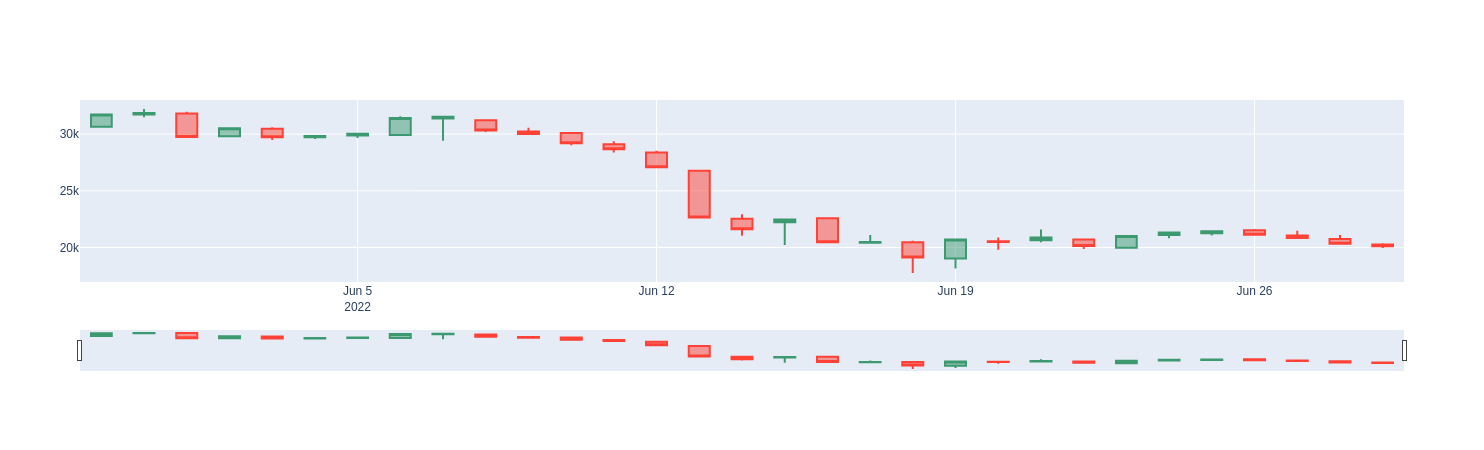

In [38]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
